In [261]:
import pandas as pd
import numpy as np
import seaborn as sns

##### Load the data file using pandas.

In [262]:
data = pd.read_csv('googleplaystore.csv')

In [263]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


##### Check for null values in the data. Get the number of null values for each column.

In [264]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [265]:
## To check if there are any null values in each column/field
data.isnull().any()

App               False
Category          False
Rating             True
Reviews           False
Size              False
Installs          False
Type               True
Price             False
Content Rating     True
Genres            False
Last Updated      False
Current Ver        True
Android Ver        True
dtype: bool

In [266]:
## If there are and how many of them are null
data.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

##### Drop records with nulls in any of the columns. 

In [267]:
data = data.dropna()

In [268]:
data.isnull().any()

App               False
Category          False
Rating            False
Reviews           False
Size              False
Installs          False
Type              False
Price             False
Content Rating    False
Genres            False
Last Updated      False
Current Ver       False
Android Ver       False
dtype: bool

##### 4(i) Size column has sizes in Kb as well as Mb. To analyze, you’ll need to convert these to numeric.

##### Extract the numeric value from the column

##### Multiply the value by 1,000, if size is mentioned in Mb

In [269]:
data["Size"]  = [
    float(i.split('M')[0])  # Convert the part before 'M' to a float
    if 'M' in i             # Check if 'M' is in the string
    else float(0)           # Otherwise, use 0.0 as the value
    for i in data["Size"]   # Iterate over each element in data["Size"]
]

data["Size"] = 1000 * data["Size"] #Convert all the size values in to Kb


In [270]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


##### 4(ii) Reviews is a numeric field that is loaded as a string field. Convert it to numeric (int/float).

In [271]:
data["Reviews"] = data["Reviews"].astype(float) # Using astype() to convert the data type to float

In [272]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9360 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9360 non-null   object 
 1   Category        9360 non-null   object 
 2   Rating          9360 non-null   float64
 3   Reviews         9360 non-null   float64
 4   Size            9360 non-null   float64
 5   Installs        9360 non-null   object 
 6   Type            9360 non-null   object 
 7   Price           9360 non-null   object 
 8   Content Rating  9360 non-null   object 
 9   Genres          9360 non-null   object 
 10  Last Updated    9360 non-null   object 
 11  Current Ver     9360 non-null   object 
 12  Android Ver     9360 non-null   object 
dtypes: float64(3), object(10)
memory usage: 1023.8+ KB


##### 4(iii) Installs field is currently stored as string and has values like 1,000,000+. 

##### Treat 1,000,000+ as 1,000,000

##### remove ‘+’, ‘,’ from the field, convert it to integer

In [273]:
data["Installs"]  = [
    float(i.replace('+','').replace(',', ''))  # Replace the +,',' to no space in the Installs Column
    if '+' in i or ',' in i           # Check if '+',"," is in the string
    else float(0)           # Otherwise, use 0.0 as the value
    for i in data["Installs"]   # Iterate over each element in data["Size"]
]
data["Installs"] = data["Installs"].astype(int)

In [274]:
data.shape

(9360, 13)

In [275]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9360 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9360 non-null   object 
 1   Category        9360 non-null   object 
 2   Rating          9360 non-null   float64
 3   Reviews         9360 non-null   float64
 4   Size            9360 non-null   float64
 5   Installs        9360 non-null   int64  
 6   Type            9360 non-null   object 
 7   Price           9360 non-null   object 
 8   Content Rating  9360 non-null   object 
 9   Genres          9360 non-null   object 
 10  Last Updated    9360 non-null   object 
 11  Current Ver     9360 non-null   object 
 12  Android Ver     9360 non-null   object 
dtypes: float64(3), int64(1), object(9)
memory usage: 1023.8+ KB


##### Price field is a string and has $ symbol. Remove ‘$’ sign, and convert it to numeric.

In [276]:
data["Price"]  = [
    float(i.replace('$',''))  # Replace the '$' to no space in the Price Column
    if '$' in i           # Check if '$',"," is in the string
    else float(0)           # Otherwise, use 0.0 as the value
    for i in data["Price"]   # Iterate over each element in data["Size"]
]
data["Price"] = data["Price"].astype(int)

In [277]:
data.shape

(9360, 13)

##### 5(i) Average rating should be between 1 and 5 as only these values are allowed on the play store. Drop the rows that have a value outside this range.

In [278]:
data.drop(data[(data['Reviews'] < 1) & (data['Reviews'] > 5 )].index, inplace = True)

In [279]:
data.shape

(9360, 13)

In [280]:
data.Reviews.unique()

array([1.59000e+02, 9.67000e+02, 8.75100e+04, ..., 6.03000e+02,
       1.19500e+03, 3.98307e+05])

##### Reviews should not be more than installs as only those who installed can review the app. If there are any such records, drop them.

In [281]:
data = data[(data["Reviews"] <= data['Installs'])]
data = data.reset_index(drop=True)


In [282]:
data.shape

(9353, 13)

##### For free apps (type = “Free”), the price should not be >0. Drop any such rows.

In [283]:
data.drop(data[(data['Type'] =='Free') & (data['Price'] > 0 )].index, inplace = True)

In [284]:
data.shape

(9353, 13)

In [285]:
data.Price.unique()

array([  0,   4,   3,   6,   7,   5,   2,   1,   9,  10,  24,  11,  79,
        16,  14,  29,  12,  19,  15,  33,  39,   8, 399,  17, 400, 299,
       379,  37,  18, 389,  13])

##### Univariate Analysis

In [286]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_boxplot(data, column, title=None, xlabel=None, ylabel=None):
    """
    Plots a box plot for the specified column in the given DataFrame.
    
    Parameters:
    data (DataFrame): The DataFrame containing the data.
    column (str): The column name for which the box plot is to be generated.
    title (str, optional): Title of the plot.
    xlabel (str, optional): Label for the x-axis.
    ylabel (str, optional): Label for the y-axis.
    """
    
    # Create the box plot using seaborn
    plt.figure(figsize=(12, 8))
    sns.boxplot(x=data[column])
    
    # Set the title and labels if provided
    if title:
        plt.title(title, fontsize=16)
    if xlabel:
        plt.xlabel(xlabel, fontsize=14)
    if ylabel:
        plt.ylabel(ylabel, fontsize=14)
    else:
        plt.ylabel(column, fontsize=14)

    # Show the plot
    plt.show()
    
    skew = data[column].skew()
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    total_outlier_num = ((data[column] < (Q1 - 1.5 * IQR)) | (data[column] > (Q3 + 1.5 * IQR))).sum()
    print(f'Mean {column.capitalize()} = {data[column].mean()}')
    print(f'Median {column.capitalize()} = {data[column].median()}')
    print(f'Skewness of {column}: {skew}.')
    print(f'Total number of outliers in {column} distribution: {total_outlier_num}.') 

##### Box Plot for Price - are there any outliers with respect to price or unsual to other apps

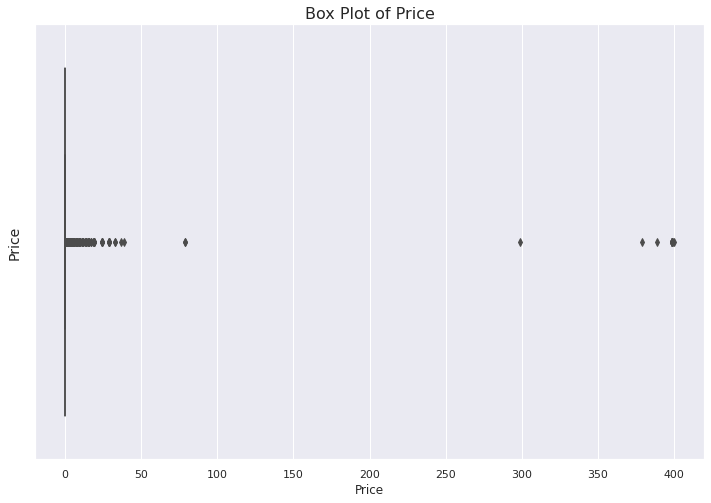

Mean Price = 0.8997113225702983
Median Price = 0.0
Skewness of Price: 24.45723341591901.
Total number of outliers in Price distribution: 537.


In [287]:
plot_boxplot(data, 'Price', title='Box Plot of Price')

##### Boxplot for Reviews - Are there any apps with very high number of reviews? Do the values seem right?

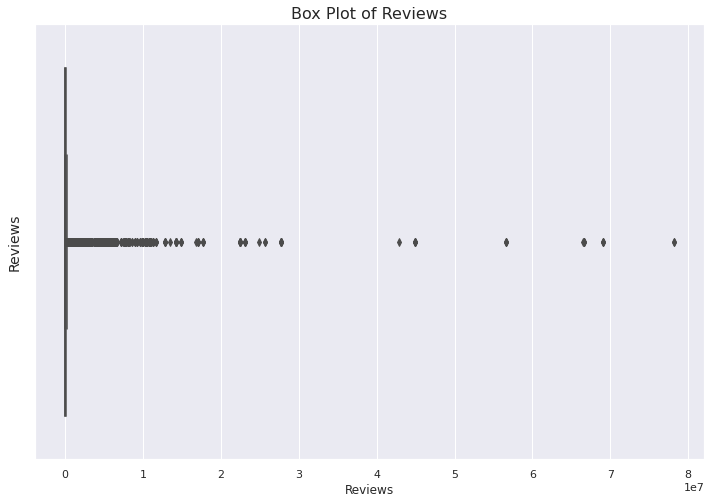

Mean Reviews = 514760.5758580135
Median Reviews = 5967.0
Skewness of Reviews: 15.297403520174901.
Total number of outliers in Reviews distribution: 1634.


In [288]:
plot_boxplot(data, 'Reviews', title='Box Plot of Reviews')

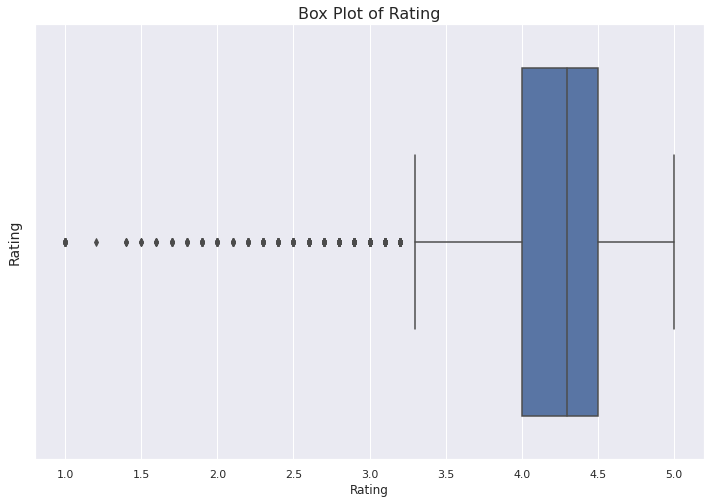

Mean Rating = 4.191254143055704
Median Rating = 4.3
Skewness of Rating: -1.8535011679813707.
Total number of outliers in Rating distribution: 502.


In [289]:
plot_boxplot(data, 'Rating', title='Box Plot of Rating')

##### Histogram for Rating

##### How are the ratings distributed? Is it more toward higher ratings?

In [290]:
def plot_histogram(data, column, bins=10, title=None, xlabel=None, ylabel=None, kde=False):
    """
    Plots a histogram for the specified column in the given DataFrame.
    
    Parameters:
    data (DataFrame): The DataFrame containing the data.
    column (str): The column name for which the histogram is to be generated.
    bins (int, optional): Number of bins for the histogram. Default is 10.
    title (str, optional): Title of the plot.
    xlabel (str, optional): Label for the x-axis.
    ylabel (str, optional): Label for the y-axis.
    kde (bool, optional): Whether to plot a kernel density estimate (KDE) line. Default is False.
    """
    
    # Create the histogram using seaborn
    plt.figure(figsize=(10, 6))
    sns.histplot(data[column], bins=bins, kde=kde)
    
    # Set the title and labels if provided
    if title:
        plt.title(title, fontsize=16)
    if xlabel:
        plt.xlabel(xlabel, fontsize=14)
    else:
        plt.xlabel(column, fontsize=14)
    if ylabel:
        plt.ylabel(ylabel, fontsize=14)
    else:
        plt.ylabel('Frequency', fontsize=14)
    
    # Show the plot
    plt.show()

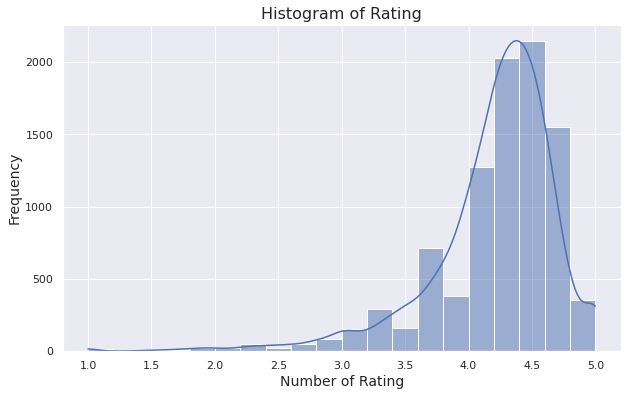

In [291]:
plot_histogram(data, 'Rating', bins=20, title='Histogram of Rating', xlabel='Number of Rating', kde=True)

Yes, the Ratings are more distributed towards the higher rating


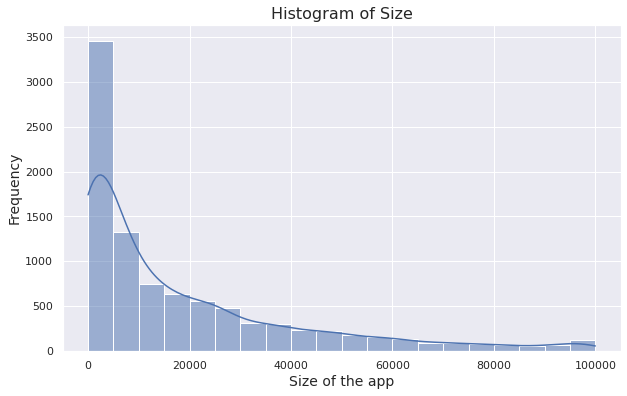

In [292]:
plot_histogram(data, 'Size', bins=20, title='Histogram of Size', xlabel='Size of the app', kde=True)

It is evident that the lesser the size of the app and higer the distribution is

##### Price: From the box plot, it seems like there are some apps with very high price. A price of $200 for an application on the Play Store is very high and suspicious!Check out the records with very high priceIs 200 indeed a high price?Drop these as most seem to be junk apps

In [293]:
High_price = data.apply(lambda x : True
            if x['Price'] > 200 else False, axis = 1) 

In [294]:
high_price_app_count = len(High_price[High_price == True].index) 
high_price_app_count

15

There are 15 apps with price greater than $200. Dropping these records


In [295]:
data.drop(data[data['Price'] > 200].index, inplace = True)

In [296]:
data.shape

(9338, 13)

##### 6(ii) Reviews: Very few apps have very high number of reviews. These are all star apps that don’t help with the analysis and, in fact, will skew it. Drop records having more than 2 million reviews.

In [297]:
data.drop(data[data['Reviews'] > 2000000].index, inplace = True)

#####  Installs:  There seems to be some outliers in this field too. Apps having very high number of installs should be dropped from the analysis.Find out the different percentiles – 10, 25, 50, 70, 90, 95, 99. Decide a threshold as cutoff for outlier and drop records having values more than that

In [298]:
quantile_install = data['Installs'].quantile([.1, .25, .5, .70, .90, .95, .99]) 

In [299]:
quantile_install

0.10         1000.0
0.25        10000.0
0.50       500000.0
0.70      1000000.0
0.90     10000000.0
0.95     10000000.0
0.99    100000000.0
Name: Installs, dtype: float64

In [300]:
# dropping more than 10000000 Installs value
data.drop(data[data['Installs'] > 10000000].index, inplace = True)

In [301]:
data.shape

(8496, 13)

In [302]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_scatter(data, x_col, y_col, title=None, xlabel=None, ylabel=None, color=None, marker='o', alpha=0.7):
    """
    Plots a scatter plot for the specified columns in the given DataFrame.
    
    Parameters:
    data (DataFrame): The DataFrame containing the data.
    x_col (str): The column name for the x-axis.
    y_col (str): The column name for the y-axis.
    title (str, optional): Title of the plot.
    xlabel (str, optional): Label for the x-axis.
    ylabel (str, optional): Label for the y-axis.
    color (str, optional): Color of the scatter points.
    marker (str, optional): Marker style for scatter points. Default is 'o'.
    alpha (float, optional): Transparency level of the scatter points. Default is 0.7.
    """
    
    # Create the scatter plot using seaborn
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=data, x=x_col, y=y_col, color=color, marker=marker, alpha=alpha)
    
    # Set the title and labels if provided
    if title:
        plt.title(title, fontsize=16)
    if xlabel:
        plt.xlabel(xlabel, fontsize=14)
    else:
        plt.xlabel(x_col, fontsize=14)
    if ylabel:
        plt.ylabel(ylabel, fontsize=14)
    else:
        plt.ylabel(y_col, fontsize=14)
    
    # Show the plot
    plt.show()

##### Bivariate analysis

##### Make scatter plot/joinplot for Rating vs. Price

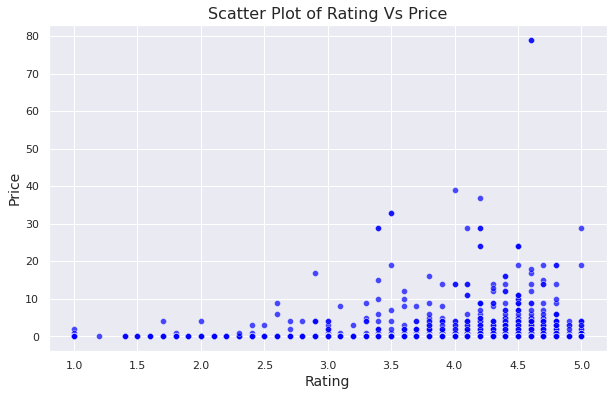

In [303]:
# Assuming 'data' is your DataFrame and you want to plot 'Feature1' vs 'Feature2'

plot_scatter(data, 'Rating', 'Price', title='Scatter Plot of Rating Vs Price', xlabel='Rating', ylabel='Price', color='blue')

From the scatter plot, we can make out that ratings are higher for the apps with higher price

##### Make scatter plot/joinplot for Rating vs. Size

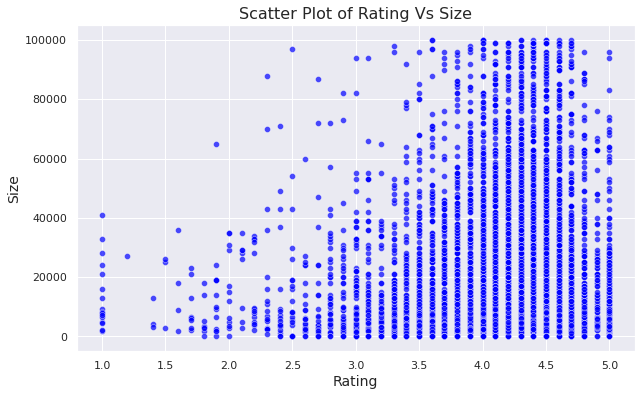

In [304]:
# Assuming 'data' is your DataFrame and you want to plot 'Feature1' vs 'Feature2'
plot_scatter(data, 'Rating', 'Size', title='Scatter Plot of Rating Vs Size', xlabel='Rating', ylabel='Size', color='blue')

Positive rating are indeed for the large apps

##### Make scatter plot/joinplot for Rating vs. Reviews

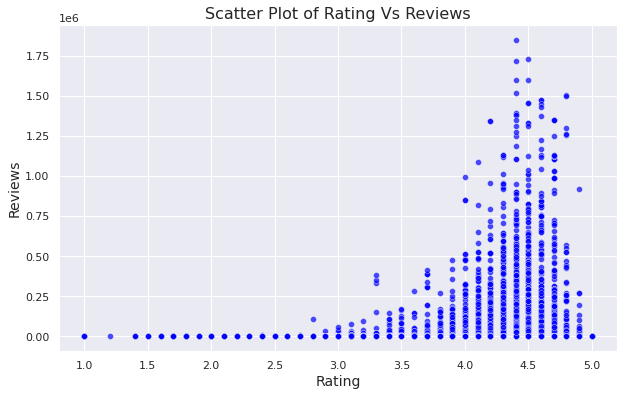

In [305]:
plot_scatter(data, 'Rating', 'Reviews', title='Scatter Plot of Rating Vs Reviews', xlabel='Rating', ylabel='Reviews', color='blue')

Most the reviews for the app are coming from the high rated apps


##### Make boxplot for Rating vs. Content Rating

In [306]:
def multi_plot_boxplot(data, x_col, y_col, title=None, xlabel=None, ylabel=None, figsize=(12, 8)):
    """
    Plots a box plot with labels for both x and y axes.
    
    Parameters:
    data (DataFrame): The DataFrame containing the data.
    x_col (str): The column name for the x-axis (categorical variable).
    y_col (str): The column name for the y-axis (numeric variable).
    title (str, optional): Title of the plot.
    xlabel (str, optional): Label for the x-axis.
    ylabel (str, optional): Label for the y-axis.
    figsize (tuple, optional): Size of the figure. Default is (12, 8).
    """
    
    plt.figure(figsize=figsize)
    
    # Create the box plot
    sns.boxplot(data=data, x=x_col, y=y_col)
    
    # Set the title and labels if provided
    if title:
        plt.title(title, fontsize=16)
    if xlabel:
        plt.xlabel(xlabel, fontsize=14)
    else:
        plt.xlabel(x_col, fontsize=14)
    if ylabel:
        plt.ylabel(ylabel, fontsize=14)
    else:
        plt.ylabel(y_col, fontsize=14)
    
    # Show the plot
    plt.show()


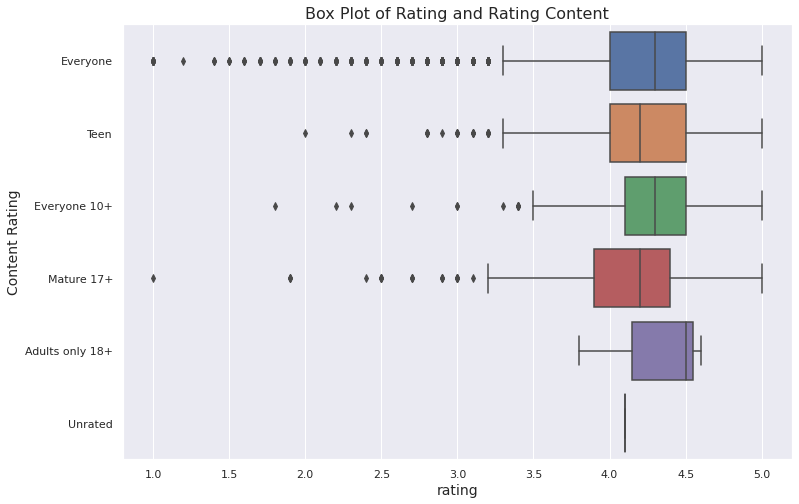

In [307]:
multi_plot_boxplot(data, x_col='Rating',y_col='Content Rating', title='Box Plot of Rating and Rating Content', xlabel = 'rating',ylabel='Content Rating')

Apps which are for everyone tend to have more lower rating when compared to other apps. Adults only 18+ has higher rating and almost more 3.5

##### Make boxplot for Ratings vs. Category

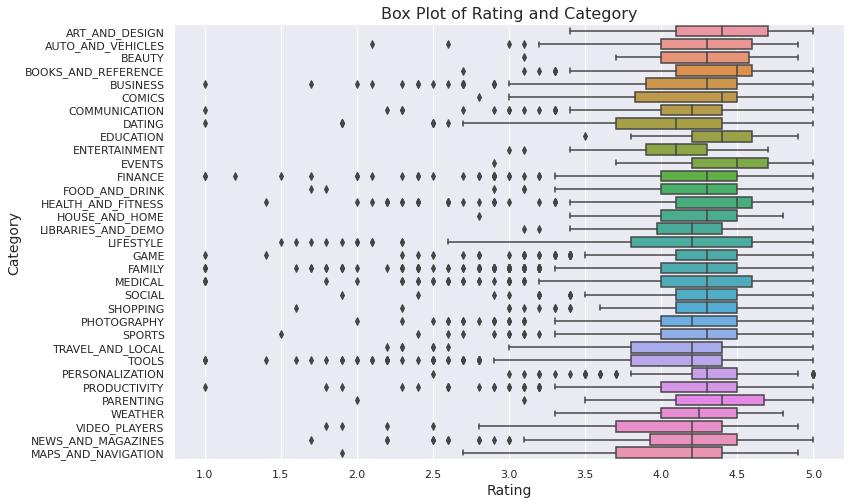

In [308]:
multi_plot_boxplot(data, x_col='Rating',y_col='Category', title='Box Plot of Rating and Category', xlabel = 'Rating',ylabel='Category')

Events Category has the best rating with more than 3.5 all over

In [309]:
inp1 = data

In [310]:
inp1.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19000.0,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14000.0,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8700.0,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2800.0,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167.0,5600.0,50000,Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up


In [311]:
inp1.skew()

/tmp/ipykernel_91/3545313420.py:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  inp1.skew()


Rating      -1.749753
Reviews      4.576494
Size         1.655917
Installs     1.543697
Price       18.074542
dtype: float64

In [312]:
reviewskew = np.log1p(inp1['Reviews'])
inp1['Reviews'] = reviewskew

In [313]:
reviewskew.skew()

-0.20039949659264156

In [314]:
installsskew = np.log1p(inp1['Installs'])
inp1['Installs'] 

0          10000
1         500000
2        5000000
4         100000
5          50000
          ...   
9348         500
9349        5000
9350         100
9351        1000
9352    10000000
Name: Installs, Length: 8496, dtype: int64

In [315]:
installsskew.skew()

-0.5097286542754812

In [316]:
inp1.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,5.075174,19000.0,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,6.875232,14000.0,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,11.379520,8700.0,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,6.875232,2800.0,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,5.123964,5600.0,50000,Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up


In [317]:
inp1.drop(["Last Updated","Current Ver","Android Ver","App","Type"],axis=1,inplace=True)

In [318]:
inp1.head()

,Category,Rating,Reviews,Size,Installs,Price,Content Rating,Genres
0,ART_AND_DESIGN,4.1,5.075174,19000.0,10000,0,Everyone,Art & Design
1,ART_AND_DESIGN,3.9,6.875232,14000.0,500000,0,Everyone,Art & Design;Pretend Play
2,ART_AND_DESIGN,4.7,11.379520,8700.0,5000000,0,Everyone,Art & Design
4,ART_AND_DESIGN,4.3,6.875232,2800.0,100000,0,Everyone,Art & Design;Creativity
5,ART_AND_DESIGN,4.4,5.123964,5600.0,50000,0,Everyone,Art & Design


In [319]:
inp2 = inp1

In [320]:
inp2.head()

,Category,Rating,Reviews,Size,Installs,Price,Content Rating,Genres
0,ART_AND_DESIGN,4.1,5.075174,19000.0,10000,0,Everyone,Art & Design
1,ART_AND_DESIGN,3.9,6.875232,14000.0,500000,0,Everyone,Art & Design;Pretend Play
2,ART_AND_DESIGN,4.7,11.379520,8700.0,5000000,0,Everyone,Art & Design
4,ART_AND_DESIGN,4.3,6.875232,2800.0,100000,0,Everyone,Art & Design;Creativity
5,ART_AND_DESIGN,4.4,5.123964,5600.0,50000,0,Everyone,Art & Design


##### Applying encoding on category,Content Rating and Genres columns

In [321]:
#get unique values in Column "Category"
inp2.Category.unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

In [322]:
inp2.Category = pd.Categorical(inp2.Category)

x = inp2[['Category']]
del inp2['Category']

dummies = pd.get_dummies(x, prefix = 'Category')
inp2 = pd.concat([inp2,dummies], axis=1)
inp2.head()

,Rating,Reviews,Size,Installs,Price,Content Rating,Genres,Category_ART_AND_DESIGN,Category_AUTO_AND_VEHICLES,Category_BEAUTY,...,Category_PERSONALIZATION,Category_PHOTOGRAPHY,Category_PRODUCTIVITY,Category_SHOPPING,Category_SOCIAL,Category_SPORTS,Category_TOOLS,Category_TRAVEL_AND_LOCAL,Category_VIDEO_PLAYERS,Category_WEATHER
0,4.1,5.075174,19000.0,10000,0,Everyone,Art & Design,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3.9,6.875232,14000.0,500000,0,Everyone,Art & Design;Pretend Play,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4.7,11.379520,8700.0,5000000,0,Everyone,Art & Design,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4.3,6.875232,2800.0,100000,0,Everyone,Art & Design;Creativity,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5,4.4,5.123964,5600.0,50000,0,Everyone,Art & Design,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [323]:
inp2["Genres"].unique()

array(['Art & Design', 'Art & Design;Pretend Play',
       'Art & Design;Creativity', 'Auto & Vehicles', 'Beauty',
       'Books & Reference', 'Business', 'Comics', 'Comics;Creativity',
       'Communication', 'Dating', 'Education', 'Education;Creativity',
       'Education;Education', 'Education;Music & Video',
       'Education;Action & Adventure', 'Education;Pretend Play',
       'Education;Brain Games', 'Entertainment',
       'Entertainment;Brain Games', 'Entertainment;Creativity',
       'Entertainment;Music & Video', 'Events', 'Finance', 'Food & Drink',
       'Health & Fitness', 'House & Home', 'Libraries & Demo',
       'Lifestyle', 'Lifestyle;Pretend Play', 'Card', 'Casual', 'Puzzle',
       'Action', 'Arcade', 'Word', 'Racing', 'Casual;Creativity',
       'Sports', 'Board', 'Simulation', 'Role Playing', 'Adventure',
       'Strategy', 'Simulation;Education', 'Action;Action & Adventure',
       'Trivia', 'Casual;Brain Games', 'Simulation;Action & Adventure',
       'Education

###### As there are too many uniuqe categories, creating the encoding for these would be tedious and is not receommended too. So lets take only those categories which has volume i.e., remove the categogies where the samples are very less and will make a new cateogry as "others"

In [324]:
lists = []
for i in inp2.Genres.value_counts().index:
    if inp2.Genres.value_counts()[i]<20:
        lists.append(i)
inp2.Genres = ['Other' if i in lists else i for i in inp2.Genres] 

In [325]:
inp2["Genres"].unique()

array(['Art & Design', 'Other', 'Auto & Vehicles', 'Beauty',
       'Books & Reference', 'Business', 'Comics', 'Communication',
       'Dating', 'Education', 'Education;Education',
       'Education;Pretend Play', 'Entertainment',
       'Entertainment;Music & Video', 'Events', 'Finance', 'Food & Drink',
       'Health & Fitness', 'House & Home', 'Libraries & Demo',
       'Lifestyle', 'Card', 'Casual', 'Puzzle', 'Action', 'Arcade',
       'Word', 'Racing', 'Sports', 'Board', 'Simulation', 'Role Playing',
       'Adventure', 'Strategy', 'Trivia', 'Educational;Education',
       'Casual;Pretend Play', 'Medical', 'Social', 'Shopping',
       'Photography', 'Travel & Local', 'Tools', 'Personalization',
       'Productivity', 'Parenting', 'Weather', 'Video Players & Editors',
       'News & Magazines', 'Maps & Navigation', 'Educational', 'Casino'],
      dtype=object)

In [326]:
inp2.Genres = pd.Categorical(inp2['Genres'])
x = inp2[["Genres"]]
del inp2['Genres']
dummies = pd.get_dummies(x, prefix = 'Genres')
inp2 = pd.concat([inp2,dummies], axis=1)

In [327]:
inp2["Content Rating"].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

In [328]:
inp2['Content Rating'] = pd.Categorical(inp2['Content Rating'])

x = inp2[['Content Rating']]
del inp2['Content Rating']

dummies = pd.get_dummies(x, prefix = 'Content Rating')
inp2 = pd.concat([inp2,dummies], axis=1)
inp2.head()

,Rating,Reviews,Size,Installs,Price,Category_ART_AND_DESIGN,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,...,Genres_Trivia,Genres_Video Players & Editors,Genres_Weather,Genres_Word,Content Rating_Adults only 18+,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Content Rating_Unrated
0,4.1,5.075174,19000.0,10000,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,3.9,6.875232,14000.0,500000,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,4.7,11.379520,8700.0,5000000,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,4.3,6.875232,2800.0,100000,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
5,4.4,5.123964,5600.0,50000,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


#### Lets Deploy the logistic regression model. Make rating of the app as dependent variable

In [329]:
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LinearRegression as LR
from sklearn.metrics import mean_squared_error as mse

In [345]:
model_data = inp2
X = model_data.drop('Rating',axis=1)
y = model_data['Rating']

Xtrain, Xtest, ytrain, ytest = tts(X,y, test_size=0.3, random_state=5)

##### Implement Logistic Regression 

In [346]:
Xtrain

,Reviews,Size,Installs,Price,Category_ART_AND_DESIGN,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,Category_COMICS,...,Genres_Trivia,Genres_Video Players & Editors,Genres_Weather,Genres_Word,Content Rating_Adults only 18+,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Content Rating_Unrated
8565,8.677269,4400.0,100000,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
733,11.412906,0.0,5000000,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
7840,11.830208,51000.0,5000000,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1755,9.147933,33000.0,100000,4,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2021,7.686621,99000.0,500000,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8115,2.397895,3000.0,5000,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
3572,10.542258,9100.0,1000000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4814,12.381957,35000.0,10000000,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
2594,8.881003,7300.0,500000,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [347]:
reg_all = LR()
reg_all.fit(Xtrain,ytrain)

LinearRegression()

In [348]:
R2_train = round(reg_all.score(Xtrain,ytrain),3)
print("The R2 value of the Training Set is : {}".format(R2_train))

The R2 value of the Training Set is : 0.074


In [349]:
R2_test = round(reg_all.score(Xtest,ytest),3)
print("The R2 value of the Testing Set is : {}".format(R2_test))

The R2 value of the Testing Set is : 0.063
